In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[1.0, 0.72335, 0.077834, 0.067682, 0.054146], [1.0, 0.741399, 0.328257, 0.103779, 0.040609], [1.0, 0.683869, 0.36379, 0.083474, 0.040609], [1.0, 0.33982, 0.358714, 0.094755, 0.047377]]


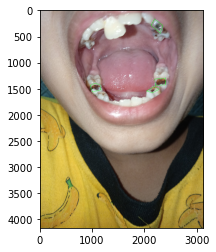

In [3]:
def show_rgb(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img0 = cv2.imread('dentistsmile_tfds/dataset/Karies/0319E_Karies.jpg')
img1 = cv2.imread('dentistsmile_tfds/dataset/Original All/0319E.jpg')
labels = [list(map(float, i.split(' '))) for i in open('0319E.txt', 'r').read().split('\n')]
print(labels)
show_rgb(img0)

In [20]:
import copy

def get_img_line(img, range_color_start, range_color_end):
    color_mask = cv2.inRange(img, range_color_start, range_color_end) # from 10 to 20
    line_img = cv2.bitwise_and(img,img, mask=color_mask)
    return color_mask, line_img

def create_img_line(img, bg_color, thick_line_color, line_thickness, all_cnts=None, blank_result=True):
    gray_line_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if blank_result:
        thick_line_img_gray = np.full_like(gray_line_img, 0)
        thick_line_img_rgb = np.full_like(img, bg_color)
    else:
        thick_line_img_gray = gray_line_img
        thick_line_img_rgb = img
    if all_cnts is None:
        all_cnts = cv2.findContours(gray_line_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = all_cnts[0] if len(all_cnts) == 2 else all_cnts[1]
    for c in cnts:
        cv2.drawContours(thick_line_img_gray, [c], -1, thick_line_color, thickness=line_thickness, lineType=cv2.FILLED)
        cv2.drawContours(thick_line_img_rgb, [c], -1, thick_line_color, thickness=line_thickness, lineType=cv2.FILLED)
    
    return all_cnts, thick_line_img_gray, thick_line_img_rgb

def fill_img_line_contours(img_gray, img_rgb, fill_color):
    laplacian = cv2.Laplacian(img_gray, cv2.CV_8UC1)
    lapl_bin, lapl_bin_val = cv2.threshold(laplacian, 25, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(lapl_bin_val, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    inpaint_mask = copy.deepcopy(img_rgb)
    for contour in contours:
        cv2.drawContours(inpaint_mask, [contour], -1, fill_color, thickness=-1)
    return inpaint_mask


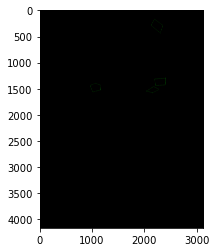

In [21]:
color_mask, line_img = get_img_line(img0, (0, 250, 0), (5, 255, 255))
show_rgb(line_img)

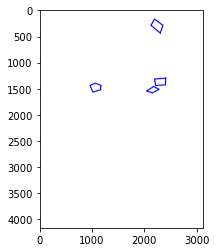

In [37]:
all_cnts, r0, r1 = create_img_line(line_img, (255, 255, 255), (255, 0, 0), 20)

show_rgb(r1)

274


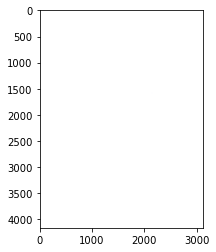

In [42]:
test = np.full_like(r1, (255, 255, 255))
cnts = all_cnts[0] if len(all_cnts) == 2 else all_cnts[1]
print(len(cnts))
max_len_cnts = sorted([(len(cnts[i]), i) for i in range(len(cnts))])
for c in cnts:
    cv2.drawContours(test, [c], -1, (255, 0, 0), thickness=-1)
    if (255 in test):
        break
show_rgb(test)